In [1]:
import os
import sys
import numpy as np
import torch
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append("../authorship_attribution/")
sys.path.append("../obfuscated_ast_similarity//")

In [3]:
import model as ast_model
import train as ast_train
import utilities as ast_utilities
import obfuscation
import json
import obfuscated_trainer

In [4]:
original_path = "../authorship_attribution/experiments/GCJ-108/plain/"

In [5]:
# complete_model = ast_utilities.load_plain_model(complete_model, )
# model_params = json.loads(open(os.path.join(path, "components", "ast_encoder_params.json")).read())
model_params = json.loads(open(os.path.join(original_path, "best_state", "components", "ast_encoder_params.json")).read())


In [6]:
ast_encoder = ast_model.ASTEncoder(model_params)
ast_encoder.load(os.path.join(original_path, "best_state", "components"))

In [7]:
batcher = obfuscated_trainer.Batcher({}, 0.8)
batcher.load_from_attribution_batcher(original_path)
# batcher.load_from_attribution_batcher("../authorship_attribution/experiments/GCJ-108/regularized-sep-coef-names/")
# batcher.load(original_path)

In [8]:
# batcher.train_data

In [9]:
# data = ast_utilities.read_all_gcj()

In [10]:
# data = ast_utilities.filter_by_count(data, 15, 1000)
# batcher = obfuscated_trainer.Batcher(data, 0.8)

In [11]:
# obfuscation_params = {
#     'add_kvargs':0.5,
#     'add_args':0.5,
#     'args_max_add':5,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.5,
#     'modify_body':0.5,
#     'n_modification_depth':3,
#     'max_trash_to_body':3,
#     'swap_in_body':0.5
# }

# obfuscation_params = {
#     'add_kvargs':0.8,
#     'add_args':0.8,
#     'args_max_add':8,
#     'add_call_args':0.8,
#     'call_args':5,
#     'call_kwargs':5,
#     'if_swap':0.7,
#     'modify_body':0.7,
#     'n_modification_depth':5,
#     'max_trash_to_body':5,
#     'swap_in_body':0.6
# }

# obfuscation_params = {
#     'add_kvargs':0.3,
#     'add_args':0.3,
#     'args_max_add':3,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.4,
#     'modify_body':0.4,
#     'n_modification_depth':2,
#     'max_trash_to_body':5,
#     'swap_in_body':0.5
# }

obfuscation_params = {
    'add_kvargs':0.3,
    'add_args':0.3,
    'args_max_add':10,
    'add_call_args':0.5,
    'call_args':10,
    'call_kwargs':10,
    'if_swap':0.5,
    'modify_body':0.4,
    'n_modification_depth':3,
    'max_trash_to_body':5,
    'swap_in_body':0.5
}


# obfuscation_params = {
#     'add_kvargs':0.0,
#     'add_args':0.0,
#     'args_max_add':0,
#     'add_call_args':0.0,
#     'call_args':0,
#     'call_kwargs':0,
#     'if_swap':0.0,
#     'modify_body':0.0,
#     'n_modification_depth':0,
#     'max_trash_to_body':0,
#     'swap_in_body':0.0
# }



In [12]:
# print()

In [13]:
long_names = obfuscated_trainer.order_names_by_count(batcher)

In [14]:
# validation_before = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=2)

In [19]:

# trainer_params = dict(
#     n_epochs = 200,
#     n_obfuscated = 25,
#     validate_every = 5,
#     n_problems_validation = 50,
#     validate_n_problems = 50,
#     train_n_problems = 50,
#     regularizer_coef = 0.001,
#     n_adversarial = 100,
#     adversarial_coef = 1
# )


trainer_params = dict(
    n_epochs = 200,
    n_obfuscated = 25,
    validate_every = 5,
    n_problems_validation = 50,
    validate_n_problems = 10,
    train_n_problems = 10,
    regularizer_coef = 0.000,
    n_adversarial = 1,
    adversarial_coef = 0
)


In [20]:
track_metric = {
    "metric_name":"loss",
    "function":ast_train.validate_max
}

In [21]:
path = "./experiments/gcj_108_108/pure/no_names_only_positive"
if os.path.exists(path):
    raise ValueError()

In [22]:
trainer = obfuscated_trainer.Trainer(ast_encoder, torch.optim.Adam(ast_encoder.parameters()), path=path, track_metric=track_metric)

In [23]:
# trainer.load(os.path.join(path, "last_state"))

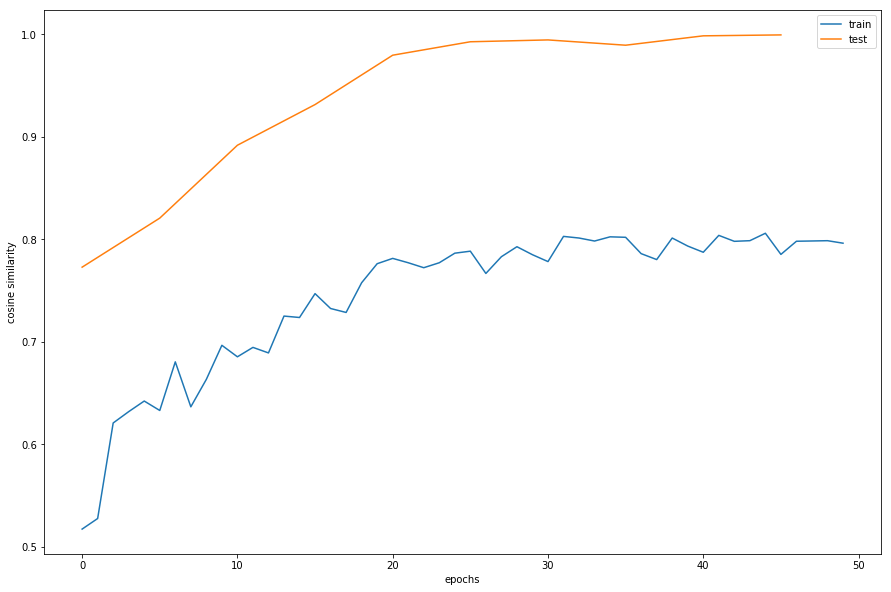

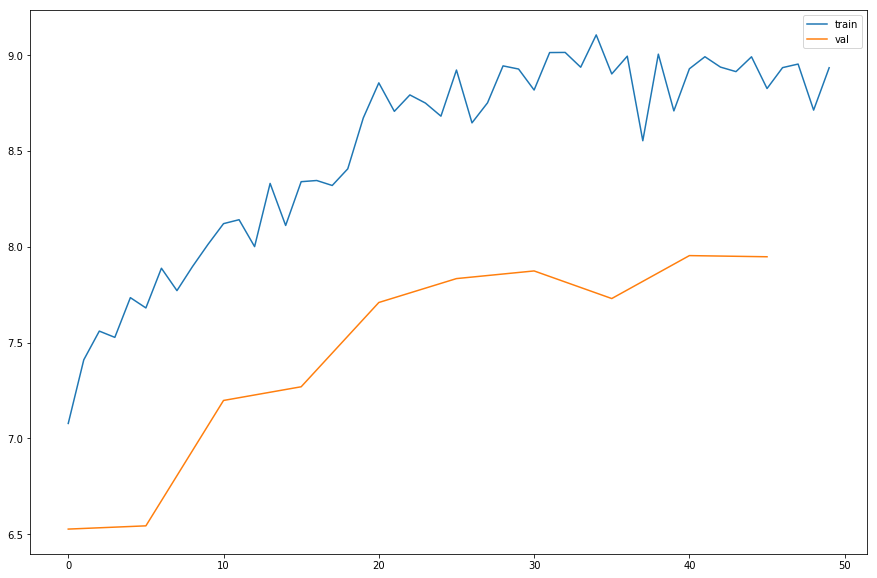

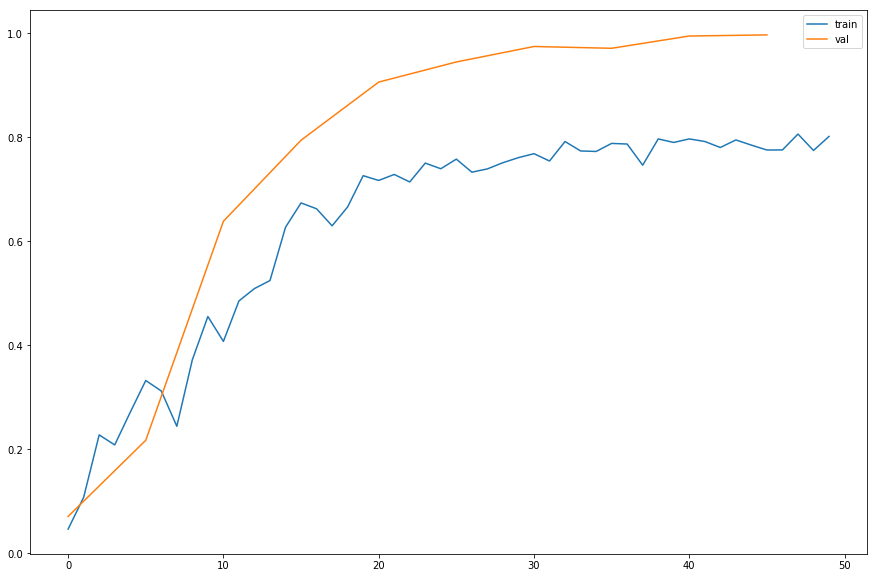

KeyboardInterrupt: 

In [24]:
trainer.train(batcher, trainer_params, obfuscation_params)

Train:
same_user 0.569175761430362
same_problem_user 0.34283917084096016
same_user_original 0.8807585891544519
Test:
same_user 0.5586355031309158
same_problem_user 0.4378240133974078
same_user_original 0.8988823358089414


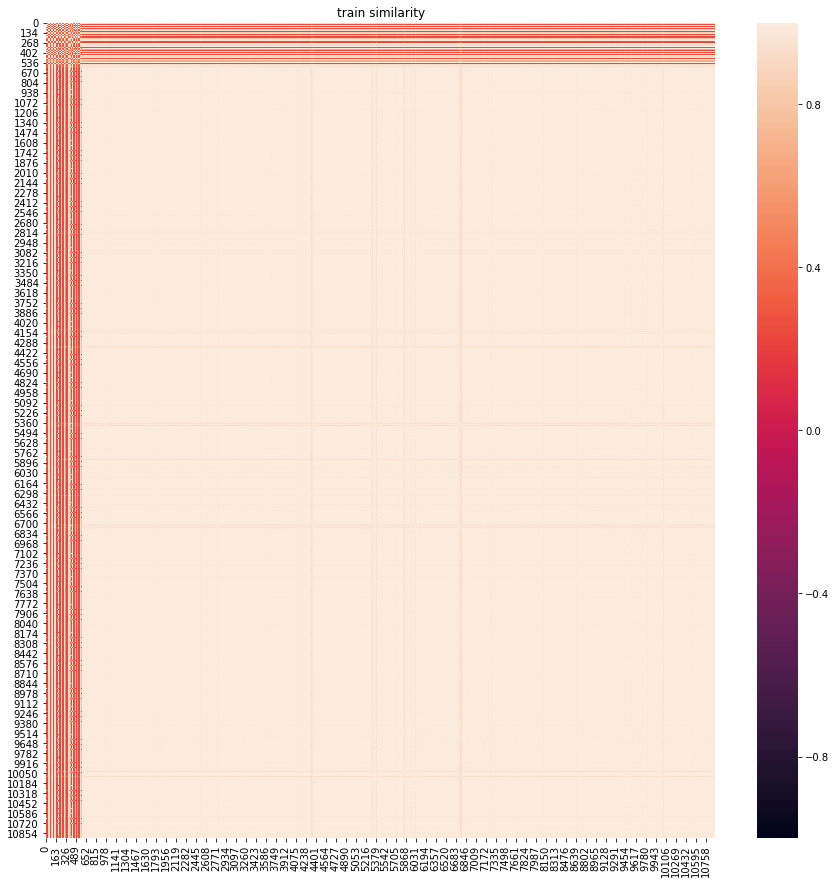

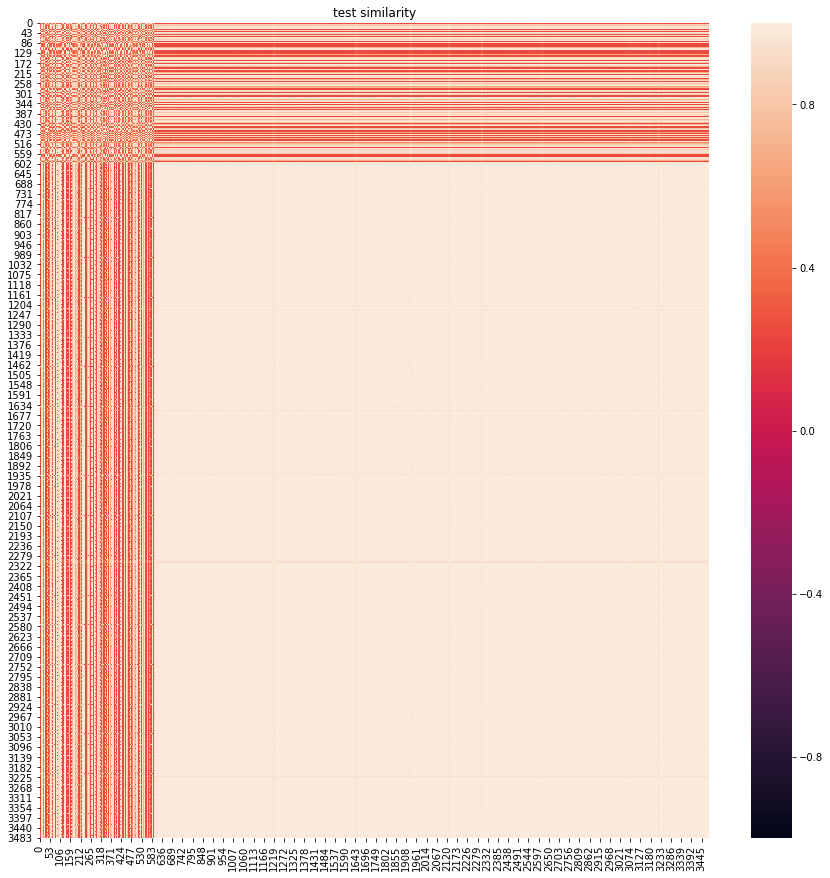

In [25]:
validation_result = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=5)

In [21]:
# validation_result_old = obfuscated_trainer.validate_old(ast_encoder, batcher, long_names[:10], obfuscation_params, n_first_for_person=5, n_obfuscated=5)

In [22]:
# validation_result_new = obfuscated_trainer.validate(ast_encoder, batcher, long_names[:10], obfuscation_params, max_for_user=5, n_obfuscated=5)

In [23]:
# validation_result_new[0]["indices"]["__fictional__"]

In [24]:
# validation_result_new[0]["back_indices"][30:60]

In [25]:
# validation_result_2 = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=5, n_obfuscated=5)

In [26]:
# validation_result__ = obfuscated_trainer.validate(ast_encoder, batcher, long_names[:20], obfuscation_params, max_for_user=100, n_obfuscated=5)

In [22]:
# validation_result = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=5)

In [23]:
# list(map(lambda x: len(x), validation_result[1]['indices'].values()))

In [39]:
def print_metrics(test_result):
#     print("Test:")
    counters = obfuscated_trainer.calculate_metric_counters(test_result["sim"], test_result["indices"], test_result["back_indices"])
    metrics = obfuscated_trainer.calculate_metrics(counters)
    for metric_name, metric in metrics.items():
        print(metric_name, np.mean(list(metric.values())))

#     plt.figure(figsize=(15, 15))
#     plt.title("test similarity")
#     sns.heatmap(test_result["sim"], vmin=-1.0, vmax=1.0)

In [41]:
print_metrics(validation_result[1])

same_user 0.31376185237571375
same_user_original 0.4932098765432098
same_problem_user 0.24164734557992984


In [43]:
validation_result[1]['back_indices']

[('pawko0', 0, 'original'),
 ('pawko0', 0, 0),
 ('pawko0', 0, 1),
 ('pawko0', 0, 2),
 ('pawko0', 0, 3),
 ('pawko0', 0, 4),
 ('pawko0', 1, 'original'),
 ('pawko0', 1, 0),
 ('pawko0', 1, 1),
 ('pawko0', 1, 2),
 ('pawko0', 1, 3),
 ('pawko0', 1, 4),
 ('pawko0', 2, 'original'),
 ('pawko0', 2, 0),
 ('pawko0', 2, 1),
 ('pawko0', 2, 2),
 ('pawko0', 2, 3),
 ('pawko0', 2, 4),
 ('pawko0', 3, 'original'),
 ('pawko0', 3, 0),
 ('pawko0', 3, 1),
 ('pawko0', 3, 2),
 ('pawko0', 3, 3),
 ('pawko0', 3, 4),
 ('pawko0', 4, 'original'),
 ('pawko0', 4, 0),
 ('pawko0', 4, 1),
 ('pawko0', 4, 2),
 ('pawko0', 4, 3),
 ('pawko0', 4, 4),
 ('pawko0', 5, 'original'),
 ('pawko0', 5, 0),
 ('pawko0', 5, 1),
 ('pawko0', 5, 2),
 ('pawko0', 5, 3),
 ('pawko0', 5, 4),
 ('pawko0', 6, 'original'),
 ('pawko0', 6, 0),
 ('pawko0', 6, 1),
 ('pawko0', 6, 2),
 ('pawko0', 6, 3),
 ('pawko0', 6, 4),
 ('pawko0', 7, 'original'),
 ('pawko0', 7, 0),
 ('pawko0', 7, 1),
 ('pawko0', 7, 2),
 ('pawko0', 7, 3),
 ('pawko0', 7, 4),
 ('Jethol0', 0, 

In [59]:
cur = validation_result[1]
for row_id, row in enumerate(cur['sim']):
    asort = (-row).argsort()
    best = asort[1]
    
    print(cur['back_indices'][row_id], cur['back_indices'][best])
    

('pawko0', 0, 'original') ('argusdusty0', 0, 3)
('pawko0', 0, 0) ('argusdusty0', 2, 0)
('pawko0', 0, 1) ('pawko0', 6, 'original')
('pawko0', 0, 2) ('pawko0', 4, 1)
('pawko0', 0, 3) ('pawko0', 4, 1)
('pawko0', 0, 4) ('Bugloon0', 3, 1)
('pawko0', 1, 'original') ('mgiuca0', 1, 3)
('pawko0', 1, 0) ('pawko0', 2, 4)
('pawko0', 1, 1) ('pawko0', 4, 3)
('pawko0', 1, 2) ('barryd0', 0, 2)
('pawko0', 1, 3) ('mgiuca0', 1, 4)
('pawko0', 1, 4) ('FatAlex0', 3, 2)
('pawko0', 2, 'original') ('bbest0', 3, 2)
('pawko0', 2, 0) ('argusdusty0', 0, 4)
('pawko0', 2, 1) ('bigOnion0', 1, 'original')
('pawko0', 2, 2) ('nobodyisme0', 4, 1)
('pawko0', 2, 3) ('bbest0', 3, 2)
('pawko0', 2, 4) ('pawko0', 0, 0)
('pawko0', 3, 'original') ('pawko0', 7, 'original')
('pawko0', 3, 0) ('VuryLeo0', 1, 3)
('pawko0', 3, 1) ('bbest0', 3, 2)
('pawko0', 3, 2) ('argusdusty0', 3, 1)
('pawko0', 3, 3) ('pawko0', 6, 3)
('pawko0', 3, 4) ('SAPikachu0', 3, 2)
('pawko0', 4, 'original') ('pawko0', 4, 1)
('pawko0', 4, 0) ('pawko0', 7, 'origi

('xithan0', 1, 3) ('argusdusty0', 3, 1)
('xithan0', 1, 4) ('mgiuca0', 0, 1)
('xithan0', 2, 'original') ('mgiuca0', 0, 2)
('xithan0', 2, 0) ('xithan0', 1, 0)
('xithan0', 2, 1) ('j4b0', 1, 'original')
('xithan0', 2, 2) ('argusdusty0', 3, 1)
('xithan0', 2, 3) ('alexamici0', 0, 2)
('xithan0', 2, 4) ('xithan0', 2, 1)
('xithan0', 3, 'original') ('KennethUlrich0', 0, 0)
('xithan0', 3, 0) ('xithan0', 3, 4)
('xithan0', 3, 1) ('rlyeh0', 1, 'original')
('xithan0', 3, 2) ('xithan0', 2, 'original')
('xithan0', 3, 3) ('argusdusty0', 0, 0)
('xithan0', 3, 4) ('xithan0', 3, 0)
('dozingcat0', 0, 'original') ('dozingcat0', 1, 1)
('dozingcat0', 0, 0) ('dozingcat0', 1, 'original')
('dozingcat0', 0, 1) ('ME.py0', 2, 'original')
('dozingcat0', 0, 2) ('dozingcat0', 3, 2)
('dozingcat0', 0, 3) ('ChrisJ0', 0, 0)
('dozingcat0', 0, 4) ('dozingcat0', 3, 2)
('dozingcat0', 1, 'original') ('dozingcat0', 0, 'original')
('dozingcat0', 1, 0) ('dozingcat0', 0, 1)
('dozingcat0', 1, 1) ('Hiking0', 0, 'original')
('dozingcat

('RalfKistner0', 4, 1) ('ali.assaf0', 4, 0)
('RalfKistner0', 4, 2) ('RalfKistner0', 4, 0)
('RalfKistner0', 4, 3) ('RalfKistner0', 4, 0)
('RalfKistner0', 4, 4) ('RalfKistner0', 3, 3)
('barryd0', 0, 'original') ('KennethUlrich0', 0, 1)
('barryd0', 0, 0) ('KennethUlrich0', 3, 4)
('barryd0', 0, 1) ('KennethUlrich0', 1, 0)
('barryd0', 0, 2) ('alexamici0', 1, 'original')
('barryd0', 0, 3) ('zerodot0', 1, 0)
('barryd0', 0, 4) ('ali.assaf0', 5, 4)
('barryd0', 1, 'original') ('barryd0', 1, 4)
('barryd0', 1, 0) ('barryd0', 1, 'original')
('barryd0', 1, 1) ('barryd0', 1, 4)
('barryd0', 1, 2) ('barryd0', 1, 4)
('barryd0', 1, 3) ('barryd0', 1, 2)
('barryd0', 1, 4) ('barryd0', 1, 2)
('barryd0', 2, 'original') ('pawko0', 4, 3)
('barryd0', 2, 0) ('bbest0', 4, 1)
('barryd0', 2, 1) ('barryd0', 3, 1)
('barryd0', 2, 2) ('LouisP0', 3, 3)
('barryd0', 2, 3) ('chuck0', 0, 2)
('barryd0', 2, 4) ('Jethol0', 2, 4)
('barryd0', 3, 'original') ('pawko0', 5, 4)
('barryd0', 3, 0) ('QuentinB0', 0, 2)
('barryd0', 3, 1) 

('waynerad0', 1, 'original') ('dareonion0', 4, 0)
('waynerad0', 1, 0) ('farin0', 3, 'original')
('waynerad0', 1, 1) ('waynerad0', 0, 4)
('waynerad0', 1, 2) ('waynerad0', 1, 1)
('waynerad0', 1, 3) ('farin0', 3, 1)
('waynerad0', 1, 4) ('waynerad0', 0, 4)
('waynerad0', 2, 'original') ('lidaobing0', 2, 3)
('waynerad0', 2, 0) ('VuryLeo0', 1, 3)
('waynerad0', 2, 1) ('bigOnion0', 0, 0)
('waynerad0', 2, 2) ('nobodyisme0', 3, 0)
('waynerad0', 2, 3) ('waynerad0', 3, 3)
('waynerad0', 2, 4) ('waitingkuo05270', 0, 3)
('waynerad0', 3, 'original') ('d.operator0', 0, 3)
('waynerad0', 3, 0) ('xithan0', 1, 2)
('waynerad0', 3, 1) ('Peter.Smit0', 1, 0)
('waynerad0', 3, 2) ('pawko0', 7, 'original')
('waynerad0', 3, 3) ('nobodyisme0', 0, 4)
('waynerad0', 3, 4) ('JustinKang0', 0, 3)
('Sibi0', 0, 'original') ('schapel0', 3, 1)
('Sibi0', 0, 0) ('Taizo0', 2, 'original')
('Sibi0', 0, 1) ('Sibi0', 0, 4)
('Sibi0', 0, 2) ('Sibi0', 0, 1)
('Sibi0', 0, 3) ('Sibi0', 0, 1)
('Sibi0', 0, 4) ('Sibi0', 0, 1)
('Sibi0', 1, 'o

('Fizu0', 0, 3) ('gsz0', 1, 4)
('Fizu0', 0, 4) ('Kabie0', 2, 1)
('Fizu0', 1, 'original') ('ali.assaf0', 0, 1)
('Fizu0', 1, 0) ('EricStansifer0', 5, 'original')
('Fizu0', 1, 1) ('FatAlex0', 3, 0)
('Fizu0', 1, 2) ('Fizu0', 1, 3)
('Fizu0', 1, 3) ('Fizu0', 1, 2)
('Fizu0', 1, 4) ('dareonion0', 4, 3)
('Fizu0', 2, 'original') ('argusdusty0', 2, 4)
('Fizu0', 2, 0) ('pawko0', 5, 4)
('Fizu0', 2, 1) ('bbest0', 3, 2)
('Fizu0', 2, 2) ('waitingkuo05270', 3, 3)
('Fizu0', 2, 3) ('ali.assaf0', 9, 0)
('Fizu0', 2, 4) ('Fizu0', 2, 1)
('Fizu0', 3, 'original') ('Fizu0', 3, 1)
('Fizu0', 3, 0) ('Kabie0', 2, 2)
('Fizu0', 3, 1) ('j4b0', 1, 'original')
('Fizu0', 3, 2) ('takluyver0', 0, 2)
('Fizu0', 3, 3) ('gsz0', 1, 4)
('Fizu0', 3, 4) ('FatAlex0', 3, 2)
('diver0', 0, 'original') ('diver0', 0, 3)
('diver0', 0, 0) ('Sibi0', 0, 1)
('diver0', 0, 1) ('ronnodas0', 5, 4)
('diver0', 0, 2) ('ChrisJ0', 1, 3)
('diver0', 0, 3) ('Sibi0', 0, 1)
('diver0', 0, 4) ('RalfKistner0', 0, 2)
('diver0', 1, 'original') ('Ardem0', 2, 0)

In [26]:
list(map(lambda x: len(x), validation_result[1]['metrics'].values()))

[101, 81, 89]

In [26]:
import gc
gc.collect()

71

In [ ]:
result = obfuscated_trainer.compare_cos(ast_encoder, batcher.test_data, np.mean)